In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
from sklearn.metrics import accuracy_score,precision_score

In [58]:
df = pd.read_csv('spam.csv', encoding='latin1')
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'] , axis=1 , inplace=True)

In [59]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [60]:
df.shape

(5572, 2)

In [4]:
df.rename(columns = {'v1':'target' , 'v2':'messages'} , inplace = True)

In [5]:
df['target'] = [1 if label == 'spam' else 0  for label in df['target']]
df['target']

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: target, Length: 5572, dtype: int64

In [6]:
df.duplicated().sum()
df = df.drop_duplicates()

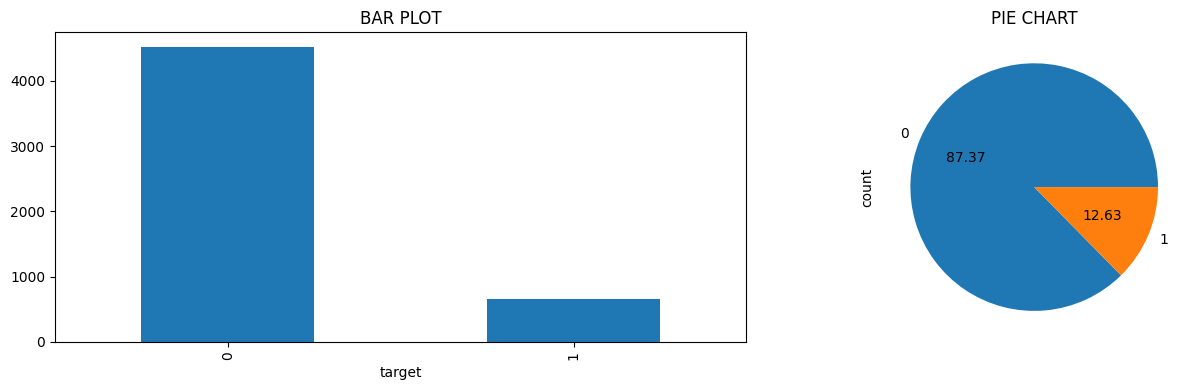

In [7]:
plt.figure(figsize = (14,4))
plt.subplot(121)
df['target'].value_counts().plot(kind='bar')
plt.title('BAR PLOT')
plt.subplot(122)
df['target'].value_counts().plot(kind = 'pie' , autopct='%0.2f')
plt.title('PIE CHART')
plt.tight_layout()

plt.show()


In [8]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\arups\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [9]:
df['number_of_characters'] = df['messages'].apply(len)

In [10]:
df['number_of_words'] = df['messages'].apply(lambda x : len(nltk.word_tokenize(x))) # This function is used to tokenize a piece of text into individual words. It takes a string x (the input text) as an argument and returns a list of words

In [11]:
df['number_of_sentences'] = df['messages'].apply(lambda x : len(nltk.sent_tokenize(x))) #This function is used to tokenize a piece of text into individual sentences. It takes a string x (the input text) as an argument and returns a list of sentences.

In [12]:
df[['number_of_characters','number_of_words','number_of_sentences']].describe()

,number_of_characters,number_of_words,number_of_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [13]:
# spam
df[df['target'] == 1][['number_of_characters','number_of_words','number_of_sentences']].describe()

,number_of_characters,number_of_words,number_of_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [14]:
# ham
df[df['target'] == 0][['number_of_characters','number_of_words','number_of_sentences']].describe()

,number_of_characters,number_of_words,number_of_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [15]:
df

,target,messages,number_of_characters,number_of_words,number_of_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [16]:
def plot(df, df_target_column, list_of_imputed_columns):
    for imputed_column in list_of_imputed_columns:
        for target_value in [0, 1]:
            sns.histplot(df[df[df_target_column] == target_value][imputed_column], color='r' if target_value == 1 else 'b', label=f'Target {target_value}')
        plt.legend()
        plt.title(f'Histogram for {imputed_column} based on {df_target_column}')
        plt.show()


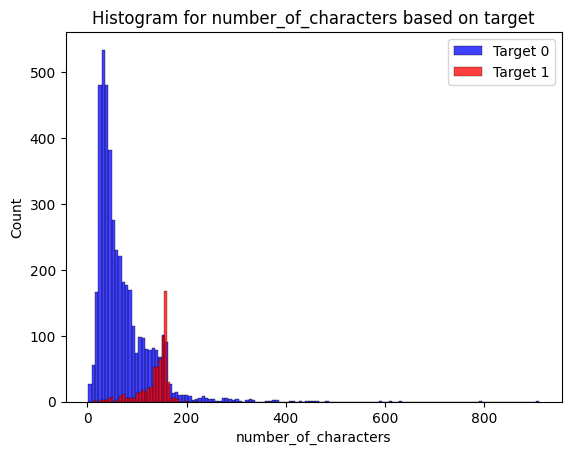

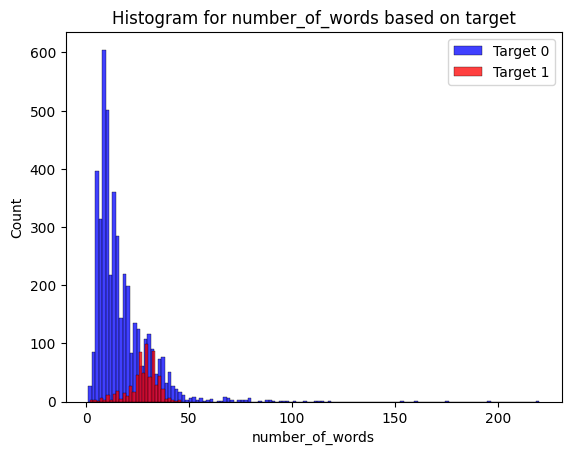

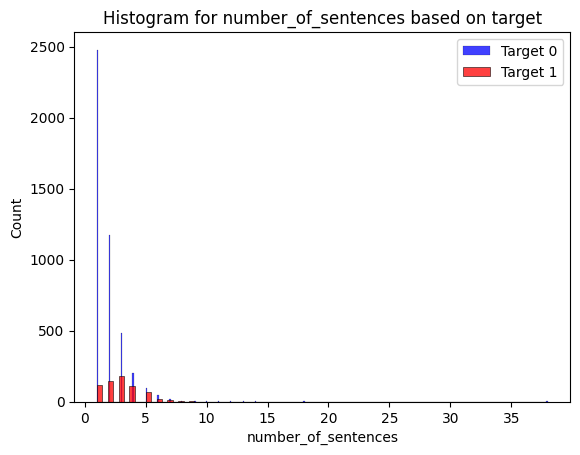

In [17]:
plot(df , 'target' , ['number_of_characters','number_of_words','number_of_sentences'])

C:\Users\arups\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


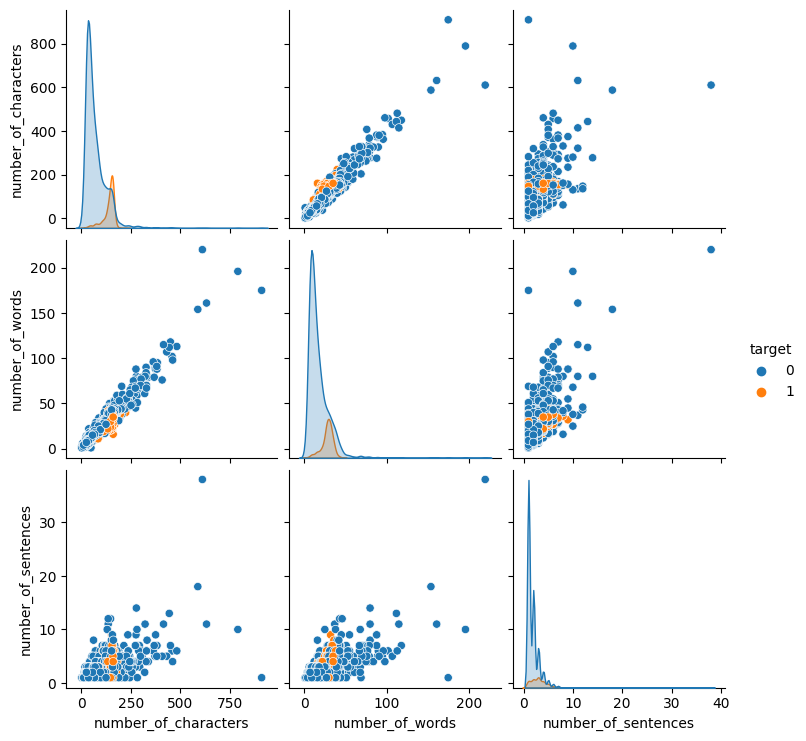

In [18]:
sns.pairplot(df , hue = 'target')
plt.show()

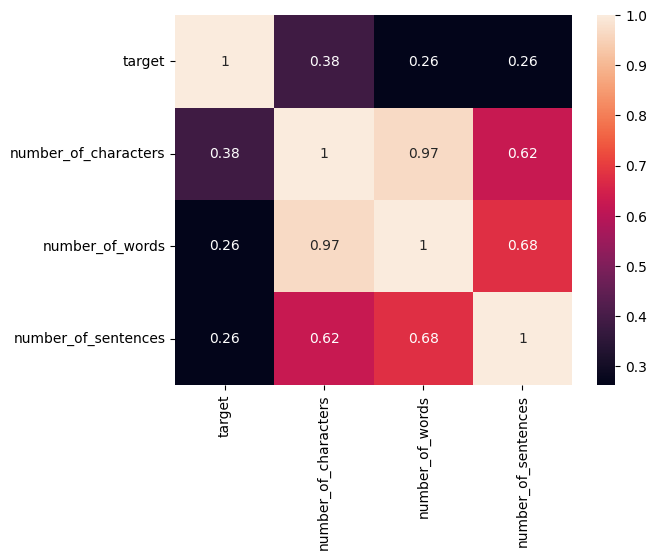

In [19]:
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr() , annot=True)
plt.show()

In [20]:
ps = PorterStemmer()

In [21]:
def transform_text(text):
    
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [22]:
transform_text("Ola i'm a Machine Learning Developer and right now i'm sleeping")

'ola machin learn develop right sleep'

In [22]:
from nltk.corpus import stopwords
stopwords.words('english') # These are used to form sentence but they does not effect in sentence meaning

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [23]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [24]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('Dancing') # basically this transfer these kind of word in short form

'danc'

In [25]:
df['transformed_messages'] = df['messages'].apply(transform_text)

In [26]:
df

,target,messages,number_of_characters,number_of_words,number_of_sentences,transformed_messages
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [27]:
from wordcloud import WordCloud
wc = WordCloud(width=800 , height=800 , min_font_size=10 , background_color='black')

In [28]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_messages'].str.cat(sep =" ")) # catination
ham_wc = wc.generate(df[df['target'] == 0]['transformed_messages'].str.cat(sep =" "))

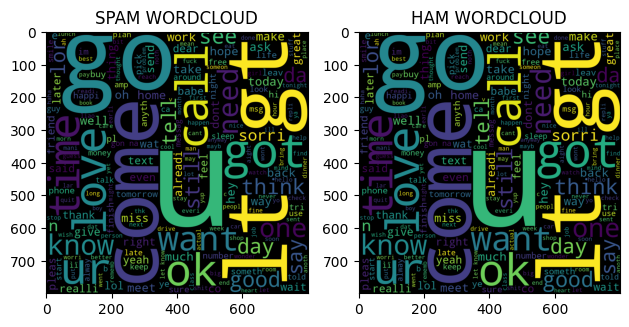

In [29]:
plt.subplot(121)
plt.imshow(spam_wc)
plt.title('SPAM WORDCLOUD')
plt.subplot(122)
plt.imshow(ham_wc)
plt.title('HAM WORDCLOUD')

plt.tight_layout()
plt.show()

In [31]:
df

In [30]:
spam_corpus = []
ham_corpus = []
# spam
for strings in df[df['target'] == 1]['transformed_messages'].tolist():
    for word in strings.split():
        spam_corpus.append(word)
 
#  ham
for strings in df[df['target'] == 0]['transformed_messages'].tolist():
    for word in strings.split():
        ham_corpus.append(word)

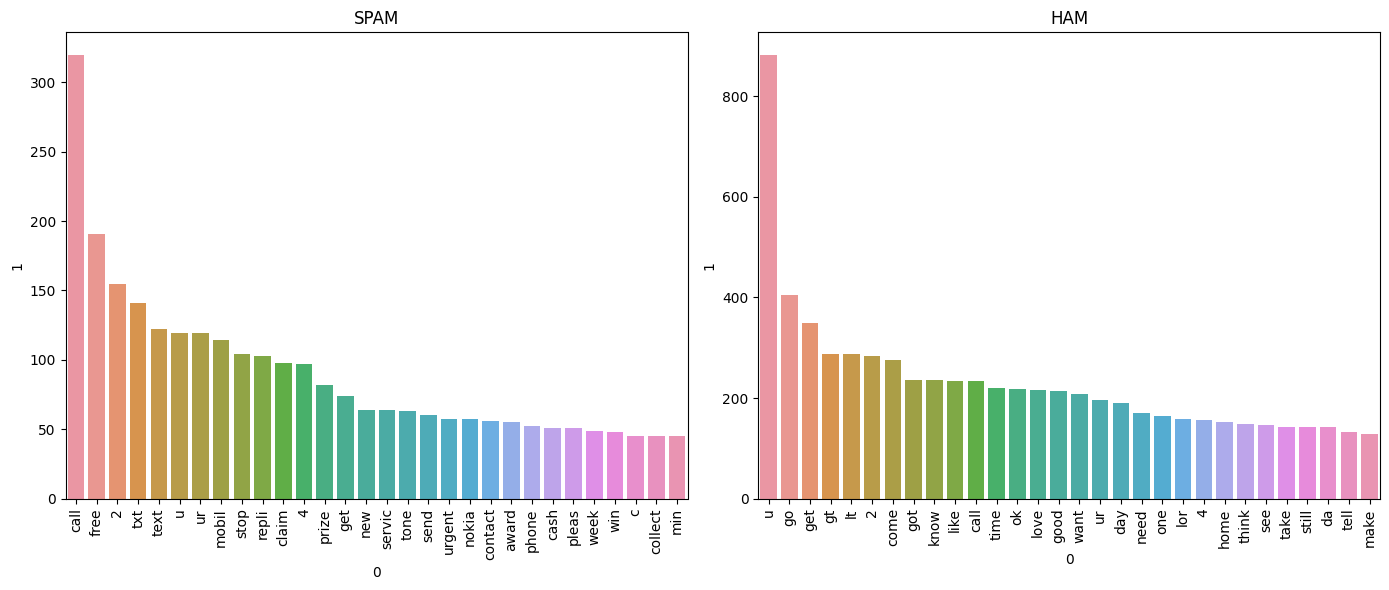

In [31]:
from collections import Counter
plt.figure(figsize = (14,6))
plt.subplot(121)
sns.barplot(x = pd.DataFrame(Counter(spam_corpus).most_common(30))[0] , y = pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.title('SPAM')
plt.subplot(122)
sns.barplot(x = pd.DataFrame(Counter(ham_corpus).most_common(30))[0] , y = pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.title('HAM')
plt.tight_layout()
plt.show()

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
X = tf.fit_transform(df['transformed_messages']).toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [34]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [35]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=15)

In [36]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [37]:
gaussian = GaussianNB()
multinomial = MultinomialNB()
bernoulli = BernoulliNB()

In [38]:
gaussian.fit(X_train , y_train)
y_pred1 = gaussian.predict(X_test)
print('Accuracy Score is ::',accuracy_score(y_test , y_pred1))
print('Precision Score is ::',precision_score(y_test , y_pred1))

Accuracy Score is :: 0.8762088974854932
Precision Score is :: 0.5186915887850467


In [39]:
multinomial.fit(X_train , y_train)
y_pred2 = multinomial.predict(X_test)
print('Accuracy Score is ::',accuracy_score(y_test , y_pred2))
print('Precision Score is ::',precision_score(y_test , y_pred2))

Accuracy Score is :: 0.9584139264990329
Precision Score is :: 1.0


In [40]:
bernoulli.fit(X_train , y_train)
y_pred3 = bernoulli.predict(X_test)
print('Accuracy Score is ::',accuracy_score(y_test , y_pred3))
print('Precision Score is ::',precision_score(y_test , y_pred3))

Accuracy Score is :: 0.9680851063829787
Precision Score is :: 0.9724770642201835


In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

In [42]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)
cat = CatBoostClassifier(n_estimators=50,random_state=2)
lgb = LGBMClassifier(n_estimators=50,random_state=2)

In [43]:
classifiers = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb,
    'cat':cat,
    'lgb':lgb
}

In [44]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [45]:
accuracy_scores = []
precision_scores = []

for name,clf in classifiers.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.965183752417795
Precision -  0.9716981132075472
For  KN
Accuracy -  0.8994197292069632
Precision -  1.0
For  NB
Accuracy -  0.9584139264990329
Precision -  1.0
For  DT
Accuracy -  0.9361702127659575
Precision -  0.8181818181818182
For  LR
Accuracy -  0.9487427466150871
Precision -  0.946236559139785
For  RF
Accuracy -  0.9700193423597679
Precision -  1.0
For  AdaBoost
Accuracy -  0.9622823984526112
Precision -  0.9145299145299145
For  BgC
Accuracy -  0.9535783365570599
Precision -  0.8384615384615385
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9824561403508771
For  GBDT
Accuracy -  0.9477756286266924
Precision -  0.9270833333333334
For  xgb
Accuracy -  0.9690522243713733
Precision -  0.956140350877193
Learning rate set to 0.294587
0:	learn: 0.4197080	total: 215ms	remaining: 10.5s
1:	learn: 0.3092555	total: 265ms	remaining: 6.36s
2:	learn: 0.2453186	total: 316ms	remaining: 4.96s
3:	learn: 0.2100799	total: 373ms	remaining: 4.29s
4:	learn: 0.1888690	total

In [46]:
performance_df = pd.DataFrame({'Algorithm':classifiers.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores})
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.965184,0.971698
1,KN,0.899420,1.000000
2,NB,0.958414,1.000000
3,DT,0.936170,0.818182
4,LR,0.948743,0.946237
5,RF,0.970019,1.000000
6,AdaBoost,0.962282,0.914530
7,BgC,0.953578,0.838462
8,ETC,0.974855,0.982456
9,GBDT,0.947776,0.927083


In [55]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,SVC,Accuracy,0.965184
1,KN,Accuracy,0.899420
2,NB,Accuracy,0.958414
3,DT,Accuracy,0.936170
4,LR,Accuracy,0.948743
5,RF,Accuracy,0.970019
6,AdaBoost,Accuracy,0.962282
7,BgC,Accuracy,0.953578
8,ETC,Accuracy,0.974855
9,GBDT,Accuracy,0.947776


C:\Users\arups\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


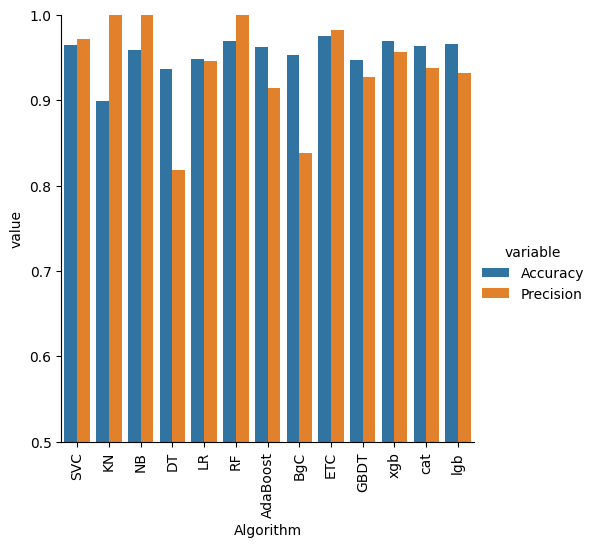

In [56]:
# Categorical Plot
sns.catplot(x='Algorithm', y='value', hue='variable', data=performance_df1, kind='bar', height=5) 
plt.ylim(0.5, 1.0)
plt.xticks(rotation='vertical')
plt.show()